# Graded Assignment 3
# Online Shoppers Purchase Prediction with Decision Tree

In this assignment, you will explore the Online Shoppers Purchasing Intention dataset to build a decision tree model to predict whether a visitor will make a purchase. You will analyze data in the online_shoppers_intention.csv file and use functions from the pandas module for loading, inspecting, and querying the data. You are expected to preprocess the data and use the data to train machine learning models from the sklearn library to solve problems.

More information about the dataset: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

For each question, there are clear instructions in each cell. Follow those instructions and write the code after each block of:

YOUR CODE HERE

Please use the exact variable name if it is specified in the comment.

We’ll run a Python test script against your program to test whether each function implementation is correct.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
"""
Import all libraries needed for the entire exercise: numpy, pyplot, and seaborn
"""
import imp
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal
import numpy.testing as nt
sol = imp.load_compiled("sol", "./.sol.py")

**Part 1: Setup and Data Loading**

In [2]:
"""
1. Import necessary libraries: pandas, numpy, matplotlib, seaborn, and sklearn

2. Load the dataset using pandas and store it in a DataFrame named "initial_shoppers_df"

3. In certain datasets, a value of 0 (zero) can indicate missing information that was not recorded. 
In the case of our dataset, assume that 0's represent missing data for the following analysis. 
Replace all 0 or 0.0 values in the DataFrame with NaN using the pandas replace() function.
   
Hint: Make sure to set 'inplace' to True

4. Display the first 5 rows of the DataFrame to understand its structure

"""

# YOUR CODE HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

initial_shoppers_df = pd.read_csv("online_shoppers_intention.csv")

initial_shoppers_df



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
initial_shoppers_df.replace(to_replace=0, value=np.nan, inplace=True)

In [4]:
initial_shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,NaN,NaN,Feb,1,1,1,1,Returning_Visitor,False,False
1,NaN,NaN,NaN,NaN,2.0,64.000000,NaN,0.10,NaN,NaN,Feb,2,2,1,2,Returning_Visitor,False,False
2,NaN,NaN,NaN,NaN,1.0,NaN,0.20,0.20,NaN,NaN,Feb,4,1,9,3,Returning_Visitor,False,False
3,NaN,NaN,NaN,NaN,2.0,2.666667,0.05,0.14,NaN,NaN,Feb,3,2,2,4,Returning_Visitor,False,False
4,NaN,NaN,NaN,NaN,10.0,627.500000,0.02,0.05,NaN,NaN,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(initial_shoppers_df, sol.initial_shoppers_df)


**Part 2: Data Preprocessing**

In [6]:
"""
1. Make a copy of initial_shoppers_df and call it "shoppers_df"

2. Check for and handle missing values in the "shoppers_df" dataframe, use the mode() of the column

3. Convert categorical variables to a suitable numeric format using Integer Encoding or One-Hot Encoding

4. Split the data into features ("X") and the target variable ("y")
   Hint: The features will be all columns except 'Revenue'
   Hint: The target will be the 'Revenue' column

5. Split the dataset into training and test sets using a 70-30 split ratio. 
Use the variable names "X_train", "X_test", "y_train", and "y_test" respectively.
"""

# YOUR CODE HERE
shoppers_df = initial_shoppers_df.copy()

In [7]:
shoppers_df.isnull().sum()

Administrative              5768
Administrative_Duration     5903
Informational               9699
Informational_Duration      9925
ProductRelated                38
ProductRelated_Duration      755
BounceRates                 5518
ExitRates                     76
PageValues                  9600
SpecialDay                 11079
Month                          0
OperatingSystems               0
Browser                        0
Region                         0
TrafficType                    0
VisitorType                    0
Weekend                        0
Revenue                        0
dtype: int64

In [8]:
# Fill missing values with mode for each column
shoppers_df = shoppers_df.fillna(shoppers_df.mode().iloc[0])

In [9]:
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,Feb,1,1,1,1,Returning_Visitor,False,False
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,Feb,2,2,1,2,Returning_Visitor,False,False
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,Feb,4,1,9,3,Returning_Visitor,False,False
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,Feb,3,2,2,4,Returning_Visitor,False,False
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
shoppers_df.shape

(12330, 18)

In [11]:
shoppers_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [14]:
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,Feb,1,1,1,1,Returning_Visitor,False,False
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,Feb,2,2,1,2,Returning_Visitor,False,False
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,Feb,4,1,9,3,Returning_Visitor,False,False
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,Feb,3,2,2,4,Returning_Visitor,False,False
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
shoppers_df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [16]:
shoppers_df["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [17]:
# Initialize OneHotEncoder for 'Month' and 'VisitorType'
encoder = OneHotEncoder(sparse=False, drop=None)

In [18]:
# Select categorical columns
categorical_cols = ["Month", "VisitorType"]

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(shoppers_df[categorical_cols])

In [19]:
encoded_array

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
feature_names = encoder.get_feature_names(categorical_cols)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=shoppers_df.index)
encoded_df

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# Drop only the categorical columns and keep others
shoppers_df = shoppers_df.drop(columns=categorical_cols)
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,1,1,1,1,False,False
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,2,2,1,2,False,False
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,4,1,9,3,False,False
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,3,2,2,4,False,False
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,3,3,1,4,True,False


In [22]:
# Concatenate the original DataFrame with encoded DataFrame
shoppers_df = pd.concat([shoppers_df, encoded_df], axis=1)

In [23]:
shoppers_df.shape

(12330, 29)

In [24]:
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.20,0.10,53.988,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.20,0.20,53.988,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.05,0.14,53.988,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.02,0.05,53.988,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
shoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [26]:
shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1.0,4.0,1.0,9.0,1.0,17.000000,0.200000,0.200000,53.988000,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,4.0,1.0,9.0,2.0,64.000000,0.200000,0.100000,53.988000,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,4.0,1.0,9.0,1.0,17.000000,0.200000,0.200000,53.988000,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,4.0,1.0,9.0,2.0,2.666667,0.050000,0.140000,53.988000,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,4.0,1.0,9.0,10.0,627.500000,0.020000,0.050000,53.988000,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,1.0,9.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,1.0,4.0,1.0,9.0,5.0,465.750000,0.200000,0.021333,53.988000,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,1.0,4.0,1.0,9.0,6.0,184.250000,0.083333,0.086667,53.988000,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,4.0,75.0,1.0,9.0,15.0,346.000000,0.200000,0.021053,53.988000,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
shoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [28]:
# List of columns to convert to uint8
uint8_cols = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
              'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 
              'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

# Convert selected columns to uint8
shoppers_df[uint8_cols] = shoppers_df[uint8_cols].astype('uint8')

# Verify data types
print(shoppers_df.dtypes)


Administrative                   float64
Administrative_Duration          float64
Informational                    float64
Informational_Duration           float64
ProductRelated                   float64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                             bool
Revenue                             bool
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct       

In [29]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(shoppers_df, sol.shoppers_df)


In [30]:
shoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [31]:
shoppers_df.shape

(12330, 29)

In [32]:
# Move 'Revenue' to the last column
revenue_col = shoppers_df.pop('Revenue')  # Remove 'Revenue' column
shoppers_df['Revenue'] = revenue_col  # Add it back as the last column

In [33]:
shoppers_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue'],
      dtype='object')

In [34]:
X = shoppers_df.iloc[:, 0:28]
y = shoppers_df.iloc[:, 28]

In [35]:
X.shape, y.shape

((12330, 28), (12330,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X_train.shape, y_train.shape

((8631, 28), (8631,))

In [38]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(X, sol.X)
assert_frame_equal(X_train, sol.X_train)
assert_frame_equal(X_test, sol.X_test)


In [39]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(y, sol.y)
assert_series_equal(y_train, sol.y_train)
assert_series_equal(y_test, sol.y_test)


**Part 3: Feature Selection Based on Correlation**

In [40]:
"""
In this section, you will select the five features with the highest correlation by calculating the
correlation between the features and the target variable.

1. Use the corr() method of pandas to calculate the correlation matrix for all columns in the DataFrame

2. Visualize the correlation matrix using seaborn's heatmap() function

3. Select the eight features that have the highest correlation with the target variable 'Revenue'. 
   Create a list containing the names of these five features.

4. Create "update_X_train" and "update_X_test" variables to store all the data for only these five features.

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q3_plot_check = 'yes' .   
  
"""

q3_plot_check = 'yes' # change to yes after you verify your plot


# YOUR CODE HERE
shoppers_df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
Administrative,1.000000,0.587471,0.328524,0.248452,0.426005,0.368660,-0.197232,-0.278874,-0.312934,-0.009770,...,-0.000266,-0.054685,-0.059517,0.053453,0.081414,0.051568,0.008556,-0.019333,-0.003830,0.124711
Administrative_Duration,0.587471,1.000000,0.279622,0.233705,0.287166,0.354123,-0.123915,-0.201706,-0.202098,-0.016209,...,-0.018932,-0.022904,-0.038731,0.032379,0.054086,0.030517,0.023549,-0.008332,-0.021110,0.092184
Informational,0.328524,0.279622,1.000000,0.589136,0.336148,0.358057,-0.186527,-0.124750,-0.185080,-0.008084,...,0.008330,-0.021065,-0.038122,0.055331,-0.008032,0.009588,-0.047047,-0.016428,0.049962,0.075171
Informational_Duration,0.248452,0.233705,0.589136,1.000000,0.274737,0.343152,-0.145681,-0.099962,-0.163233,-0.009345,...,-0.015663,-0.010833,-0.031594,0.035901,0.006109,0.001553,-0.042575,-0.012987,0.044770,0.068425
ProductRelated,0.426005,0.287166,0.336148,0.274737,1.000000,0.860845,-0.369872,-0.295111,-0.301541,0.015301,...,0.015075,-0.114692,-0.072221,0.182360,0.008928,0.005993,-0.122724,-0.036091,0.128736,0.158546
ProductRelated_Duration,0.368660,0.354123,0.358057,0.343152,0.860845,1.000000,-0.333180,-0.252901,-0.279144,0.005767,...,0.001556,-0.085473,-0.068127,0.166971,-0.008855,0.005889,-0.116615,-0.027090,0.120632,0.152217
BounceRates,-0.197232,-0.123915,-0.186527,-0.145681,-0.369872,-0.333180,1.000000,0.138774,0.190188,-0.020691,...,-0.013342,0.104168,-0.010750,-0.094662,0.016363,0.007712,0.290951,0.075270,-0.302781,0.009486
ExitRates,-0.278874,-0.201706,-0.124750,-0.099962,-0.295111,-0.252901,0.138774,1.000000,0.147336,0.003541,...,0.049547,0.002515,0.055664,-0.057841,-0.042437,-0.031771,-0.154636,0.031730,0.144031,-0.181292
PageValues,-0.312934,-0.202098,-0.185080,-0.163233,-0.301541,-0.279144,0.190188,0.147336,1.000000,0.000817,...,-0.005497,0.038767,-0.013983,-0.026296,-0.025360,-0.014927,0.099831,0.062576,-0.112544,-0.232347
SpecialDay,-0.009770,-0.016209,-0.008084,-0.009345,0.015301,0.005767,-0.020691,0.003541,0.000817,1.000000,...,-0.001088,-0.003008,0.021696,-0.003986,-0.001518,-0.001365,-0.004609,-0.000586,0.004653,-0.008728


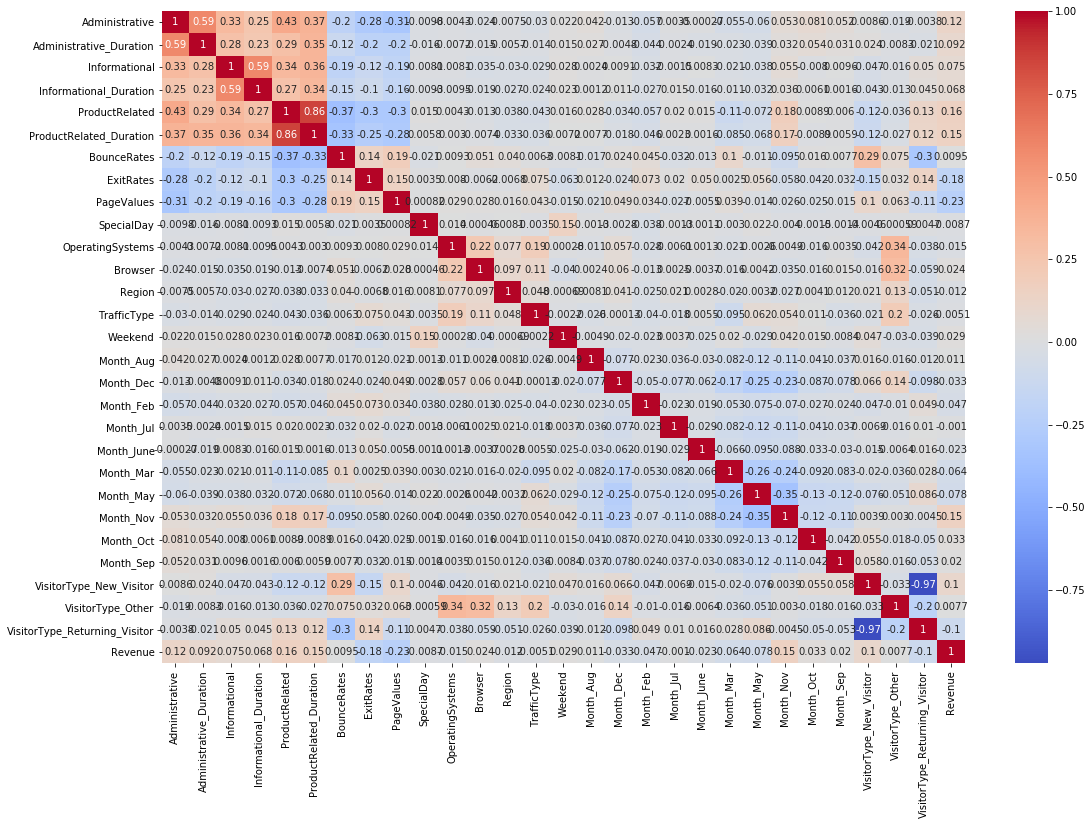

In [41]:
# Set figure size (width=18, height=12)
plt.figure(figsize=(18, 12))  

sns.heatmap(data=shoppers_df.corr(), cbar=True, cmap="coolwarm", annot=True, fmt='.2g')

plt.show()

In [42]:
# Compute correlation matrix
corr_matrix = shoppers_df.corr()

# Extract correlations with 'Revenue' and sort them from high to low
revenue_corr = corr_matrix["Revenue"].sort_values(ascending=False)

# Display the sorted correlations
print(revenue_corr)


Revenue                          1.000000
ProductRelated                   0.158546
Month_Nov                        0.154774
ProductRelated_Duration          0.152217
Administrative                   0.124711
VisitorType_New_Visitor          0.104136
Administrative_Duration          0.092184
Informational                    0.075171
Informational_Duration           0.068425
Month_Oct                        0.032666
Weekend                          0.029295
Browser                          0.023984
Month_Sep                        0.019983
Month_Aug                        0.010959
BounceRates                      0.009486
VisitorType_Other                0.007715
Month_Jul                       -0.001036
TrafficType                     -0.005113
SpecialDay                      -0.008728
Region                          -0.011595
OperatingSystems                -0.014668
Month_June                      -0.023112
Month_Dec                       -0.033112
Month_Feb                       -0

In [43]:
revenue_corr[1:9]

ProductRelated             0.158546
Month_Nov                  0.154774
ProductRelated_Duration    0.152217
Administrative             0.124711
VisitorType_New_Visitor    0.104136
Administrative_Duration    0.092184
Informational              0.075171
Informational_Duration     0.068425
Name: Revenue, dtype: float64

In [44]:
shoppers_df.shape

(12330, 29)

In [45]:
top_features = ['PageValues', 'ExitRates', 'ProductRelated', 'Month_Nov', 'ProductRelated_Duration', 
                'Administrative','VisitorType_New_Visitor', 'VisitorType_Returning_Visitor']

In [46]:
top_features

['PageValues',
 'ExitRates',
 'ProductRelated',
 'Month_Nov',
 'ProductRelated_Duration',
 'Administrative',
 'VisitorType_New_Visitor',
 'VisitorType_Returning_Visitor']

In [47]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(top_features, sol.top_features)

assert_frame_equal(update_X_train, sol.update_X_train)
assert_frame_equal(update_X_test, sol.update_X_test)


NameError: name 'update_X_train' is not defined

In [ ]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q3_plot_check)


**Part 4: Training a Decision Tree Model**

In [ ]:
"""
1. Import the DecisionTreeClassifier from sklearn

2. Create a Decision Tree model with default parameters besides the random state (random_state=42 must be set) and train it on the training data

3. Make predictions on the test set as '"y_pred"
"""

# YOUR CODE HERE


In [ ]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(type(decision_tree), type(sol.decision_tree))
nt.assert_equal(y_pred, sol.y_pred)


**Part 5: Model Evaluation**

In [ ]:
"""
1. Calculate and print the accuracy of the model on the test set as "accuracy"

2. Import and generate the confusion matrix as "conf_matrix"

3. Plot the confusion matrix using seaborn's heatmap

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q5_plot_check = 'yes' .   

"""

q5_plot_check = 'yes' # change to yes after you verify your plot

# YOUR CODE HERE


In [ ]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(accuracy, sol.accuracy)


In [ ]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q5_plot_check)


**Part 6: Experimenting with Different Parameters**

In [ ]:
"""
1. Create a new Decision Tree model with different parameters (max_depth = 5, min_samples_split = 50)

2. Train the new model on the training data called "decision_tree_tuned" 
   and make predictions on the test set

3. Evaluate the accuracy of this model and save it in "accuracy_tuned"
"""

# YOUR CODE HERE


In [ ]:
##########################
### TEST YOUR SOLUTION ###
##########################

nt.assert_equal(y_pred_tuned, sol.y_pred_tuned)
assert_equal(accuracy_tuned, sol.accuracy_tuned)
